# CS 3262 - Final Exam - Spring 2022

Welcome to your final exam! 

Logistics:
- Open book/open note/**no internet**
- You are not allowed to discuss the exam with each other
- All questions about the exam will come to me, through email. Do not send any public messages to me, or each other about the exam.
- If there are any clarifications required, I will post them on brightspace and update this document.

A note on the **kinds** of answers I expect: As is our style on HW and in class, many of these questions are open ended and are **not** asking you to repeat what you've read or heard in class. On the contrary, if I read my own words (or a texts) I will mark that down! I expect you to demonstrate your original thoughts. Almost none of these questions require 3-word answers (some do though, those should be clear by the question!). Having said that, I also don't want you to start just typing out vocabulary words that we've used in class. 

**Tip**: If you feel you can't answer a question, skip it and come back. Sometimes reading the entire thing will help clarify the individual parts. If all else fails, I will award partial credit for effort, and a clear explanation of what you're confused about and why. 

**Try and explain your confusion!**

## Changelog

<br/>
<div class='alert alert-info'>

<font size='5'>👾</font> **Note:**  This is **version 1**, updated on 2022-05-02 at 10:00am.

</div>

## Notebook Setup

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns
import pandas as pd
import sklearn as sk

# styling additions
from IPython.display import HTML
style = '''
    <style>
        div.info{
            padding: 15px; 
            border: 1px solid transparent; 
            border-left: 5px solid #dfb5b4; 
            border-color: transparent; 
            margin-bottom: 10px; 
            border-radius: 4px; 
            background-color: #fcf8e3; 
            border-color: #faebcc;
        }
        hr{
            border: 1px solid;
            border-radius: 5px;
        }
    </style>'''
HTML(style)

On this final, I want you to use everything you've learned and try to do a simple problem from start to finish on your own!

Lets use a dataset from Spotify on song popularity. Lets first modify the dataset for our final:


# Initial Preparation

In [2]:
df = pd.read_csv('song_data_orig.csv')
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

As we can see, `song_popularity` is actually a numeric column:

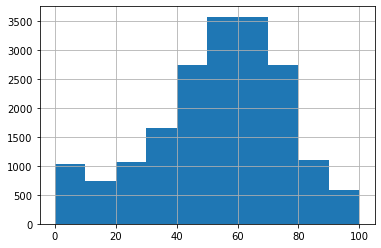

In [3]:
df['song_popularity'].hist();

Lets make this a "class label" called `is_pop` using a threshold value of 80:

In [4]:
df['is_pop'] = (df['song_popularity'] >= 80).values.astype('int')

In [5]:
df.query('is_pop == 1')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,is_pop
5,Bring Me To Life,80,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320,1
6,Last Resort,81,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724,1
8,Mr. Brightside,80,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234,1
9,Sex on Fire,81,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374,1
13,Can't Stop,81,269000,0.017900,0.618,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,4,0.875,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18671,Tie Me Down (with Elley Duhé),84,218295,0.135000,0.548,0.839,0.000000,6,0.1020,-2.371,1,0.0644,98.932,4,0.314,1
18697,Magic In The Hamptons (feat. Lil Yachty),85,164640,0.660000,0.769,0.479,0.000000,1,0.0914,-5.339,1,0.0385,96.051,4,0.803,1
18702,Body,86,163216,0.047600,0.752,0.764,0.000094,1,0.0543,-4.399,1,0.0380,121.958,4,0.582,1
18704,If You're Over Me,81,189000,0.061500,0.647,0.853,0.000000,8,0.0620,-4.516,1,0.0904,103.846,4,0.618,1


Now we have our label, so lets get rid of the `song_popularity` so we don't accidentally use it below!

In [6]:
df = df.drop('song_popularity',axis=1)
df.columns

Index(['song_name', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'is_pop'],
      dtype='object')

Now we're ready to proceed!

# Machine Learn!


I want you to take this dataset and create at least 4 separate models (KNN with different values of K all count as a single model) to predict the `is_pop` variable. 

Assess each of them separately, and then jointly at the end!

# Exploratory Data Analysis (EDA)

Below, conduct some EDA on this dataset. Observe your features. Are they related to each other? If so, how? If not, does that matter?



**Hint:** We've been using a great particular plot for EDA in class and on our HW! 

**Note:** I am **not** asking for a single plot here!

Now that you've done some exploration, write down your comments/observations here. What did you observe?

---

---

# Prepare your dataset

Using your insight from above, and in preparation of your plan below, is there anything else you need to do to "prepare" your dataset? 

Before you code it up, comment below what you will do **and why**. That is, explain why you are doing something extra to the dataset! Use the tools/techniques and concepts we learned in class!


**Hint**: Right now, we only have a single dataset - we probably need to at least carve out a test set! 

**Hint**: This is **not** the only thing I expect you to do though!

---

---

# ML Models

For each of your models below, **train** and **evaluate** them! 

For each, write **why** you are evaluating them in a certain way, and **how** you chose a particular value for a parameter, etc. 

**Tip**: You **are** allowed to use the scikit learn documentation [🔗 linked here](https://scikit-learn.org/stable/index.html)!

## Model 1 - TYPE THE MODEL NAME HERE

## Model 2 - TYPE THE MODEL NAME HERE

## ML Model 3 - TYPE THE MODEL NAME HERE

## ML Model 4 - TYPE THE MODEL NAME HERE

# Comparison/Evaluation/Comments

Here, write down your thoughts on the above 4 models.

* How did they perform individually? 
* How can we compare them?
* Which one did "best" and why do you think this?
* etc.

Include any figures/plots in your explanation to help your explanation!

**Hint** A confusion matrix is probably a good start!

---

---

# Bonus

Answer as many of these as you'd like:

## B1

Explain what exactly PCA is **doing** to our dataset. How is it different than linear regression? 

---

---

## B2

If we were to train a NN on this dataset, how big should our input layer be? How big should your output layer be?

---

---